This requires you to write a 2D GAN game. I let you to get into the topic yourself, whitout any explonations from my side. You can watch internet, read papers and tutorials (fun, fun, fun).

### Homework

I want you to implement a simple 2D GAN game. The kind of animation, I want to see is like in [this video](https://www.youtube.com/watch?v=KeJINHjyzOU&feature=youtu.be&t=15m38s) at 15:36 or in [here](https://habrahabr.ru/post/275429/) **but in 2D**. You can google, search code at github, whatever, but the network should be based on TensoFlow.

Basically you will need to come up with true distribution $P$, say mixture of gaussians (surprise me), sample some data from it. Visualize it as a heatmap. To visualize $G$ density you can fix $N$ noise vectors $\{z_i\} \quad i=1,\dots, N$ and draw a circle for each $G(z_i)$. It is also funny to visualize discriminator as a vector field (can be done with `plt.arrow`, `plt.quiver` plot). Look how it should be in the middle of [this page](http://www.inference.vc/an-alternative-update-rule-for-generative-adversarial-networks/).

Please, make sure your code works if 'Run All' is pressed and it draws some animation.

Good luck!

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/hov/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
init = tf.initializers.random_uniform(-1,1)

In [3]:
z  = tf.placeholder(tf.float32, shape=[None, 1], name="z")

gl1 = tf.layers.dense(z,  20, activation=tf.nn.sigmoid, name="gl1", kernel_initializer=init)
gl2 = tf.layers.dense( gl1, 100, activation=tf.nn.sigmoid, name="gl2", kernel_initializer=init)
gl3 = tf.layers.dense( gl1,  20, activation=tf.nn.sigmoid, name="gl3", kernel_initializer=init)
gen = tf.layers.dense( gl2,   1, name="gen")

In [4]:
in_X  = tf.placeholder(tf.float32, shape=[None, 1], name="X")

dl1 = tf.layers.dense(in_X,  20, activation=tf.nn.relu, name="dl1", kernel_initializer=init)
dl2 = tf.layers.dense( dl1, 100, activation=tf.nn.relu, name="dl2", kernel_initializer=init)
dl3 = tf.layers.dense( dl2,  20, activation=tf.nn.relu, name="dl3", kernel_initializer=init)
dis = tf.layers.dense( dl3,   1, activation=tf.nn.sigmoid, name="dis")

In [5]:
data = np.random.uniform(-5, 5, size=(10000,1))

In [12]:
def getBatches(inputs, targets, batchsize):
    assert len(inputs) == len(targets)
    
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        yield inputs[start_idx:start_idx + batchsize], targets[start_idx:start_idx + batchsize]

In [13]:
model_path = "./checkpoints/model.ckpt"
saver = tf.train.Saver(max_to_keep=3)

In [19]:
optimzer = tf.train.AdamOptimizer()
train_step = optimzer.minimize(loss)

In [20]:
num_epochs = 100
batch_size = 100

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
#     saver.restore(sess, saver.last_checkpoints[-1])
    
    for epoch in range(num_epochs):
        
        train_err = 0
        train_batches = 0

        sess.run(tf.local_variables_initializer())
        
        for inputs, targets in getBatches(data, Y, batch_size):

            _, train_err_batch = sess.run(
                [train_step, loss], 
                feed_dict={in_X: inputs, out_y:targets}
            )
            train_err += train_err_batch
            train_batches += 1
#         if epoch==0:
        print(train_err/train_batches)
        saver.save(sess, model_path, global_step=epoch)


141944.150390625
86225.20359375
42450.02033203125
19312.6226953125
9593.543647460938
6417.550439453125
5593.926552734375
5344.968110351562
5145.201818847656
4885.152761230469
4570.961589355469
4193.399809570313
3778.378547363281
3356.397180175781
2922.0599462890623
2479.7139392089844
2093.3672998046877
1786.1041259765625
1544.1354028320313
1343.3807196044922
1165.4964080810546
1000.486967163086
867.3972717285156
755.350576171875
655.816764831543
566.4680084228515
485.26685943603513
422.08973693847656
372.4834729003906
330.8180535888672
295.6216909790039
266.2950134277344
241.22238861083986
219.22816871643067
199.65152137756348
181.93775039672852
165.77752143859863
151.29915115356445
138.34148063659669
126.70069622039794
116.32667293548585
107.15544136047363
99.07173233032226
91.93454570770264
85.59979560852051
79.93249267578125
74.81234893798828
70.13589462280274
65.81738513946533
61.78960758209229
58.00380260467529
54.426187133789064
51.032684841156005
47.80517509460449
44.73024765014

In [21]:
l = np.linspace(-10,10,1000)[None].T

In [22]:
l.shape

(1000, 1)

INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt-99


INFO:tensorflow:Restoring parameters from ./checkpoints/model.ckpt-99


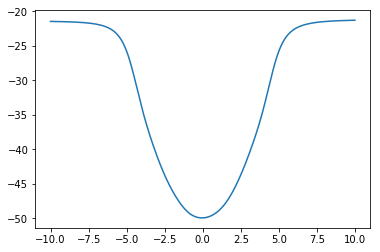

In [24]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, saver.last_checkpoints[-1])
    sess.run(tf.local_variables_initializer())
    
    results = sess.run(out, feed_dict={in_X:l})
    
    plt.plot(l,results)
#     plt.plot(data, Y)